Source https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

## Problem description ##
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting two probabilities: <br>
one for h1n1_vaccine and one for seasonal_vaccine.<br>
<br>
Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.<br>
<br>

### Labels ###
For this competition, there are two target variables:<br>
<br>
h1n1_vaccine - Whether respondent received H1N1 flu vaccine.<br>
seasonal_vaccine - Whether respondent received seasonal flu vaccine.<br>
Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. <br>
This is formulated as a multilabel (and not multiclass) problem.<br>
<br>
<br>
### The features in this dataset ###
You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.<br>
<br>
For all binary variables: 0 = No; 1 = Yes.<br>
<br>
h1n1_concern - Level of concern about the H1N1 flu.<br>
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.<br>
 <br>
h1n1_knowledge - Level of knowledge about H1N1 flu.<br>
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.<br>
 <br>
behavioral_antiviral_meds - Has taken antiviral medications. (binary)<br>
behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)<br>
behavioral_face_mask - Has bought a face mask. (binary)<br>
behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)<br>
behavioral_large_gatherings - Has reduced time at large gatherings. (binary)<br>
behavioral_outside_home - Has reduced contact with people outside of own household. (binary)<br>
behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)<br>
doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)<br>
doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)<br>
chronic_med_condition - Has any of the following chronic medical conditions:  <br>
asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary) <br>
child_under_6_months - Has regular close contact with a child under the age of six months. (binary) <br>
health_worker - Is a healthcare worker. (binary) <br>
health_insurance - Has health insurance. (binary) <br>
<br>
opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness. <br>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. <br>
 <br>
opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine. <br>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. <br>
 <br>
opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine. <br>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. <br>
 <br>
opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness. <br>
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective. <br>
 <br>
opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine. <br>
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high. <br>
 <br>
opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine. <br>
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried. <br>
 <br>
age_group - Age group of respondent. <br>
education - Self-reported education level. <br>
race - Race of respondent. <br>
sex - Sex of respondent. <br>
income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds. <br>
marital_status - Marital status of respondent. <br>
rent_or_own - Housing situation of respondent. <br>
employment_status - Employment status of respondent. <br>
hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings. <br>
census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census. <br>
household_adults - Number of other adults in household, top-coded to 3. <br>
household_children - Number of children in household, top-coded to 3. <br>
employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings. <br>
employment_occupation - Type of occupation of respondent. Values are represented as short random character strings. <br>

### Performance metric ###
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. <br>
The mean of these two scores will be the overall score. A higher value indicates stronger performance. <br>
<br>
In Python, you can calculate this using sklearn.metrics.roc_auc_score for this multilabel setup with the default average="macro" parameter. <br>
 <br>

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.svm import SVC

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [89]:
# read the csv-files and take the respondent_id column as index:

X_train_df = pd.read_csv("training_set_features.csv", index_col="respondent_id")
y_train_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
X_test_df = pd.read_csv("test_set_features.csv", index_col="respondent_id")

#X_train_df.shape
# Output:
# (26707, 36)

#X_test_df.shape
# out:
# (26708, 36)

In [90]:
#check sorting and completeness of respondent_id's in train and test data:
np.testing.assert_array_equal(X_train_df.index.values, y_train_df.index.values)

# out: 
# no output means the arrays are equal, otherwize an error would be thrown.

#### Usefull Functions ####

In [91]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], color="grey", linestyle="--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

In [92]:
def plot_roc_h1n1_and_seasonal():
    fig, ax = plt.subplots(1,2,figsize=(7, 3.5))

    plot_roc(
        y_eval["h1n1_vaccine"],
        y_preds["h1n1_vaccine"],
        "h1n1_vaccine",
        ax=ax[0]
    )

    plot_roc(
        y_eval["seasonal_vaccine"],
        y_preds["seasonal_vaccine"],
        "seasonal_vaccine",
        ax=ax[1]
    )

    fig.tight_layout()

#### Look at the Table ####

In [93]:
X_train_df.head(3)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [94]:
y_train_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0


In [95]:
print(X_train_df.shape)
print(y_train_df.shape)
print(X_test_df.shape)
print(X_train_df.dtypes)

(26707, 35)
(26707, 2)
(26708, 35)
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                          

### Data Exploration ###

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

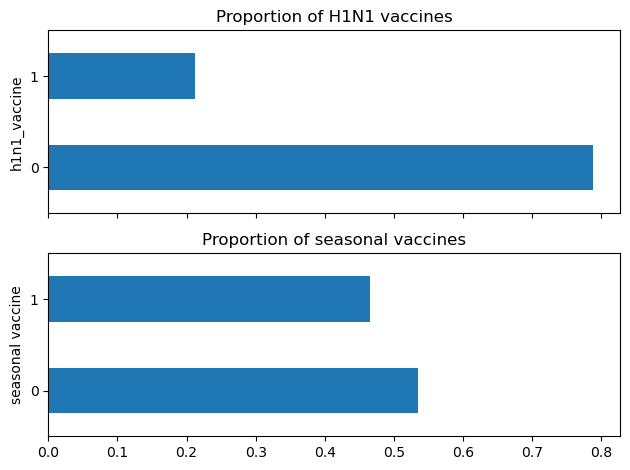

In [97]:
fig, ax = plt.subplots(2,1, sharex=True)

n_obs = y_train_df.shape[0]

y_train_df['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title='Proportion of H1N1 vaccines', ax=ax[0])

ax[0].set_ylabel('h1n1_vaccine')

y_train_df['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of seasonal vaccines", ax=ax[1])

ax[1].set_ylabel('seasonal vaccine')

fig.tight_layout()


In [98]:
CM=pd.crosstab(y_train_df['h1n1_vaccine'], y_train_df['seasonal_vaccine'], margins=True, normalize=True)
CM

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [99]:
a = CM.to_numpy()
print(f"percentage of h1n1 without seasonal: {a[1,0]/(a[1,0] + a[1,1]):.3}")
print(f"percentage of h1n1 with seasonal: {a[1,1]/(a[1,0] + a[1,1]):.3}")

percentage of h1n1 without seasonal: 0.172
percentage of h1n1 with seasonal: 0.828


In [100]:
joined_df= X_train_df.join(y_train_df)
print(joined_df.shape)
joined_df.head(3)

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0


In [101]:
counts= joined_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack('h1n1_vaccine')
print(type(counts))
print(counts)

<class 'pandas.core.frame.DataFrame'>
h1n1_vaccine     0     1
h1n1_concern            
0.0           2849   447
1.0           6756  1397
2.0           8102  2473
3.0           3250  1341


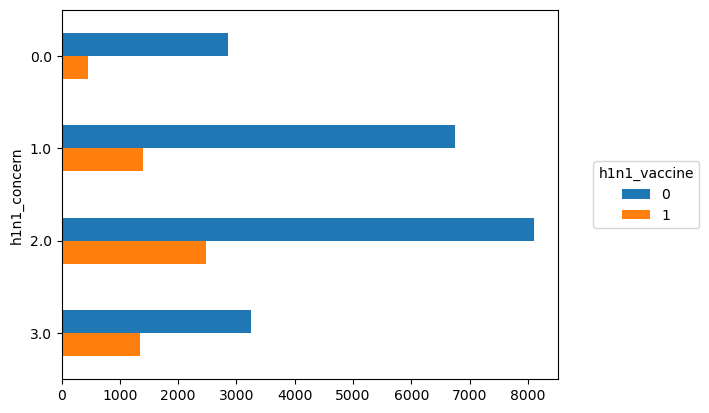

In [102]:
ax= counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='h1n1_vaccine')

In [103]:
h1n1_concern_counts = counts.sum(axis='columns')
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [104]:
props = counts.div(h1n1_concern_counts, axis='index')
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


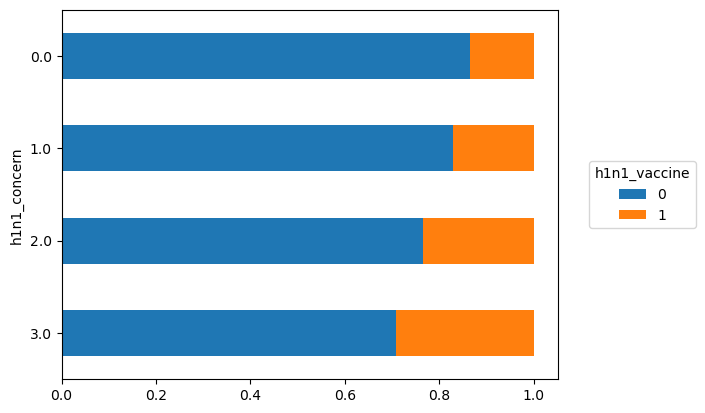

In [105]:
ax=props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="h1n1_vaccine")

In [106]:
def vaccination_rate_plot(independent_col, target_col, dataframe, ax=None):
    """Stacked bar chart of vaccination rate for target_col against independent_col.
        Args:
            independent_col (string): column name of feature (independent) variable
            target_col (string): column name of target (dependent) variable
            dataframe (pandas dataframe): dataframe that contains the indepentent- and the target-columns
            ax (matplotlib axes object, optional): matplotlib axes object to attach plot to
    """
    counts = dataframe[[independent_col, target_col]].groupby([independent_col, target_col]).size().unstack(target_col)
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

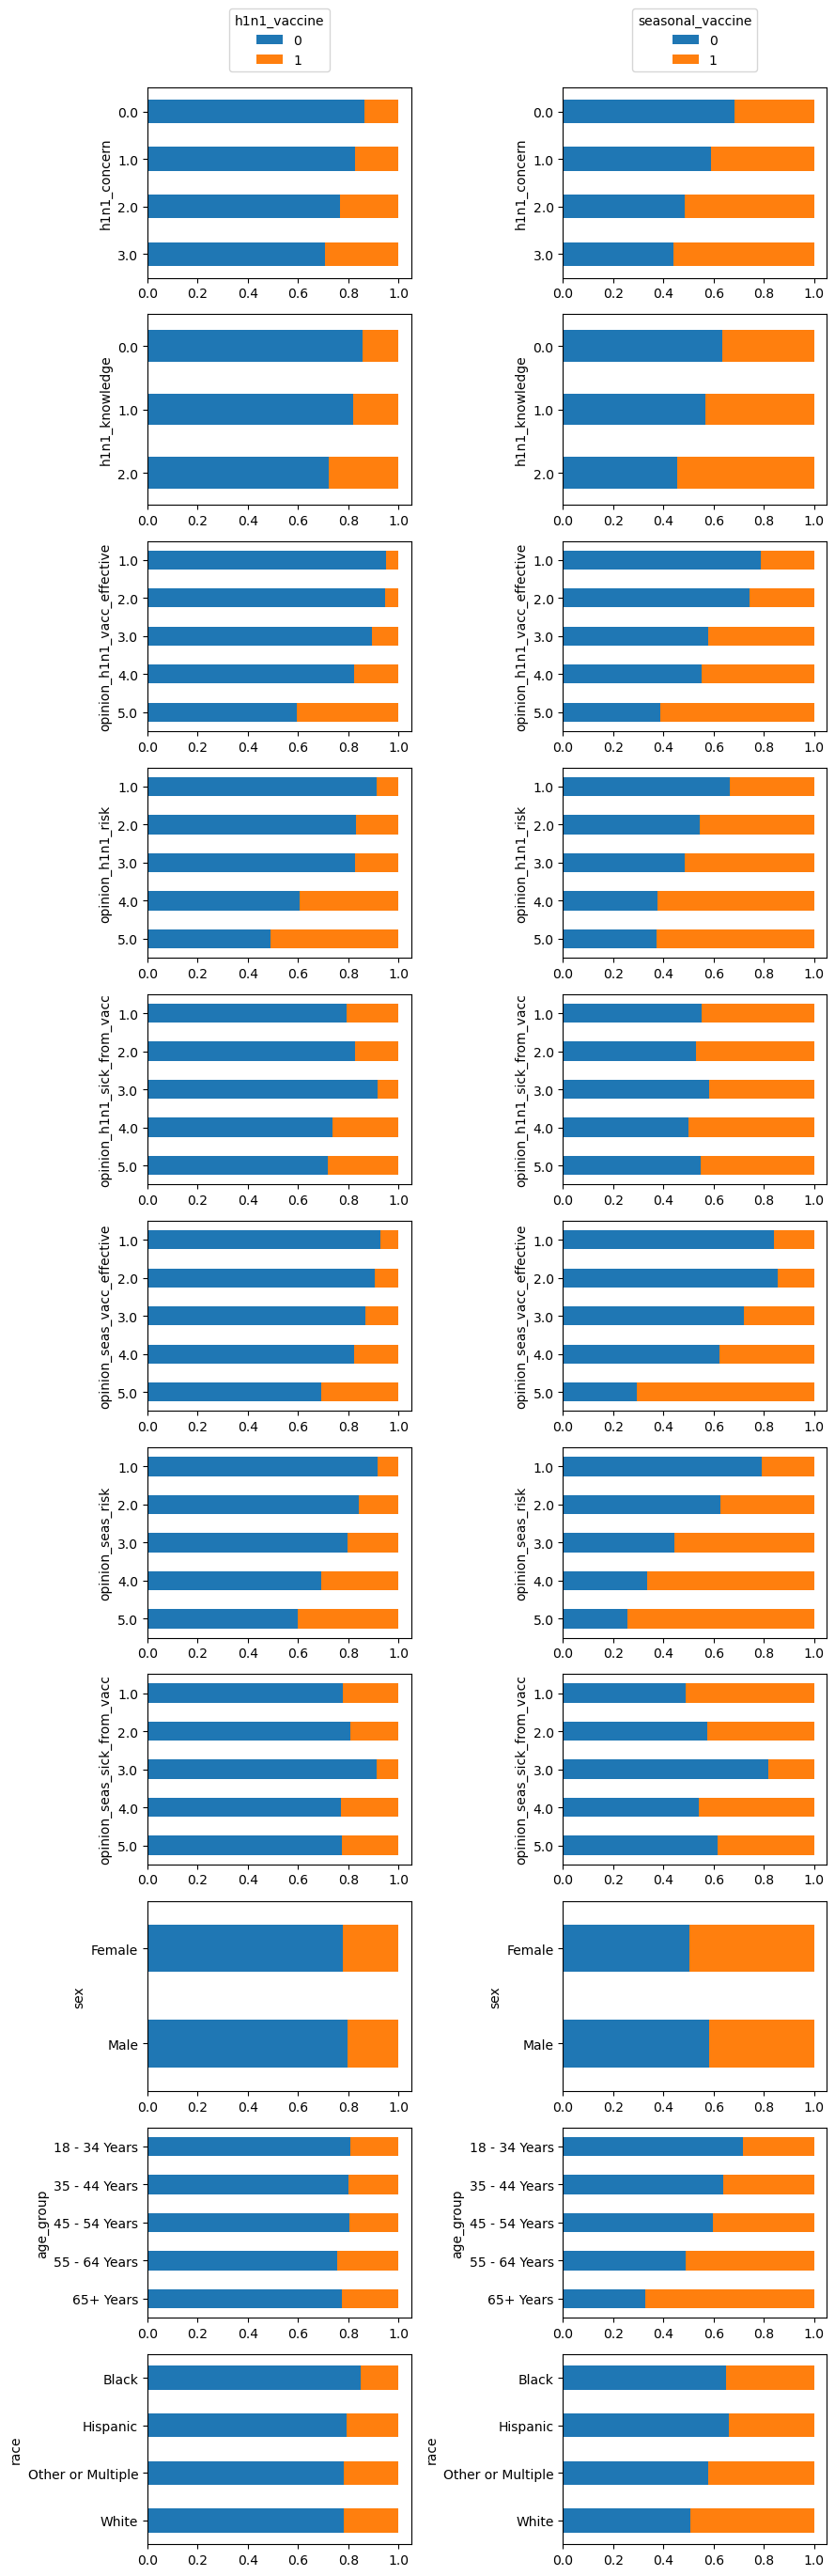

In [107]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

Use simple imputer for imputation of median for numerical columns. Scikit supports even imputation for categorical columns by strategies as "constant" or "most frequent"

In [108]:
# clean the numeric columns from unassigned values:

from sklearn.impute import SimpleImputer

numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"]

imputer = SimpleImputer(strategy="median")
X_train_numeric = X_train_df[numeric_columns]

x_imp = imputer.fit_transform(X_train_numeric)
X_train_imp = pd.DataFrame(x_imp, columns=numeric_columns, index=X_train_numeric.index)

train_median = imputer.statistics_
#imputer = SimpleImputer(strategy="constant", fill_value=train_median)

X_test_numeric = X_test_df[numeric_columns]
x_imp = imputer.transform(X_test_numeric) # uses the statistics_ obtained from fittin the train-set
X_test_imp = pd.DataFrame(x_imp, columns=numeric_columns, index=X_test_numeric.index)


In [109]:
print(X_train_imp.isna().sum().sum())
print(X_test_imp.isna().sum().sum())

0
0


In [110]:
# Determine which columns are categorial and which are numerical:

X_train_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [111]:
numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"]
numeric_columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [112]:
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"]
non_numeric_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [113]:
# convert the non-numeric-columns to one-hot-encoded columns:

X_train_clean = pd.concat([X_train_imp, pd.get_dummies(X_train_df[non_numeric_columns], drop_first=True, dummy_na=True)], axis=1)
X_test_clean = pd.concat([X_test_imp, pd.get_dummies(X_test_df[non_numeric_columns], drop_first=True, dummy_na=True)], axis=1)

In [114]:
# due to our data preparation we should only have numeric columns now:

print(f"Number of numeric columns in X_train_clean: {len(X_train_clean.columns[X_train_clean.dtypes != 'object'].values)}")
print(f"Number of all columns in X_train_clean: {len(X_train_clean.columns)}")

Number of numeric columns in X_train_clean: 105
Number of all columns in X_train_clean: 105


In [115]:
# we don't have any missing values:

print(f"Number of missing values in X_train_clean: {X_train_clean.isna().sum().sum()}")
print(f"Number of missing values in X_test_clean: {X_test_clean.isna().sum().sum()}")

Number of missing values in X_train_clean: 0
Number of missing values in X_test_clean: 0


### Models to Consider: ###
1. logistic regression <br>
2. regression with polynomial features: does this make sense if we only have 0,1 values? <br>
2. Support Vector Machine with RBF <br>
3. Random Forrest / XGBoost <br>
4. FC neural net <br>
5. CNN - because the data seem to be 0 and 1's only...: pseudo-image
<br>

### Logistic Regression - DataDriven Tutorial ###

In [116]:
# numeric columns for regression:

numeric_preprocessing_pipeline = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("simple_imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_pipeline, numeric_columns) # do not scale and impute the one-hot-encoded non-numeric columns
    ],
    remainder="drop" # drops the remaining, i.e. non-transformed columns
)

In [117]:
multi_estimator= MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1))

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("multi_estimator", multi_estimator),
])

In [118]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('multi_estimator',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [119]:
# train test split:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

# output types are pandas dataframes - we split the X_train_clean dataset:
X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size=0.33, shuffle=True, stratify=y_train_df, random_state=RANDOM_SEED)



In [120]:
# the first component of y_train contains the h1n1_vaccine labels - the predictions will be ordered accordingly:

y_train.head(1)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
9330,1,1


In [121]:
full_pipeline.fit(X_train, y_train)

preds = full_pipeline.predict_proba(X_eval)

In [122]:
# preds is a list containing two dataframes - one for h1n1 and one for seasonal predictions:

print(len(preds))
print(preds[0].shape)
print(preds[1].shape)

2
(8814, 2)
(8814, 2)


In [123]:
# first three predictions of h1n1 vaccination label (probabilty("no"), probability("yes")):
preds[0][:3]

array([[0.9370031 , 0.0629969 ],
       [0.24217469, 0.75782531],
       [0.95826257, 0.04173743]])

In [124]:
# create a label variable, y_preds, that contains the probabilites for (h1n1, seasonal) vaccination:

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1],
    },
    index=y_eval.index
)

print(f"y_preds.shape: {y_preds.shape}")
y_preds.head(3)

y_preds.shape: (8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6368,0.062997,0.018608
12566,0.757825,0.907685
13996,0.041737,0.046723


In [125]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1],[0,1], color="grey", linestyle="--")
    ax.set_ylabel("TPR")
    ax.set_xlabel("FPR")
    ax.set_title(f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

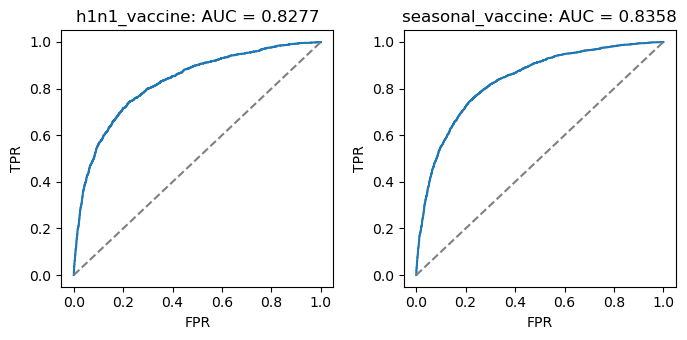

In [126]:
def plot_roc_h1n1_and_seasonal():
    fig, ax = plt.subplots(1,2,figsize=(7, 3.5))

    plot_roc(
        y_eval["h1n1_vaccine"],
        y_preds["h1n1_vaccine"],
        "h1n1_vaccine",
        ax=ax[0]
    )

    plot_roc(
        y_eval["seasonal_vaccine"],
        y_preds["seasonal_vaccine"],
        "seasonal_vaccine",
        ax=ax[1]
    )

    fig.tight_layout()

plot_roc_h1n1_and_seasonal()

In [127]:
# COMPETITION METRIC:
roc_auc_score(y_eval, y_preds)

0.8317490240860407

In [128]:
# training on full dataset:
full_pipeline.fit(X_train_df, y_train_df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', '...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('multi_estimator',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [129]:
test_preds = full_pipeline.predict_proba(X_test_df)

In [130]:
# read the submission_format.csv file to see the format that is expected for a submission file to the contest:

submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")
submission_df.head(3)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7


In [131]:
np.testing.assert_array_equal(submission_df.index.values, X_test_clean.index.values)
submission_df["h1n1_vaccine"]=test_preds[0][:,1]
submission_df["seasonal_vaccine"]=test_preds[1][:,1]

submission_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903


In [132]:
submission_df.to_csv("my_submission.csv", index=True)

### Logistic Regression - by BSC ###

Here we consider the predictions for the seasonal- and the h1n1-vacination as being independent of each other and train one predictor for each. 

In [133]:
# impute missing values, scale numeric values, one-hot-encode non-numeric values:

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"]
non_numeric_columns = X_train_df.columns[X_train_df.dtypes =="object"]

numeric_preprocessing_pipeline = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("SimpleImputer", SimpleImputer(strategy="median"))
])

ohe = OneHotEncoder()


full_columnTransformer = ColumnTransformer(
    transformers= [
        ("numeric_preprocessing", numeric_preprocessing_pipeline, numeric_columns),
        ("non_numeric_preprocessing", ohe, non_numeric_columns)
    ]
)

# classifier No 1:
h1n1_clf = LogisticRegression(random_state=42 ,penalty="l2", C=1)
h1n1_pipeline = Pipeline([
    ("full_columnTransformer", full_columnTransformer),
    ("h1n1_clf", h1n1_clf)
])

# classifier No 2:
seasonal_clf = LogisticRegression(random_state=42 ,penalty="l2", C=1)
seasonal_pipeline = Pipeline([
    ("full_columnTransformer", full_columnTransformer),
    ("seasonal_clf", seasonal_clf)
])



In [134]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size= 0.3, random_state=42, shuffle=True)

Separate the multi-labels into an h1n1- an a seasonal-label:

In [135]:
# prepare the labels for the two predictions we have to make:

y_train_h1n1 = y_train.values[:,0].ravel()
y_train_seasonal = y_train.values[:,1].ravel()
y_eval_h1n1 = y_eval.values[:,0].ravel()
y_eval_seasonal = y_eval.values[:,1].ravel()

for s, a in zip(["y_train_h1n1", "y_train_seasonal", "y_eval_h1n1", "y_eval_seasonal"], [y_train_h1n1, y_train_seasonal, y_eval_h1n1, y_eval_seasonal]):
    print(f"Shape of {s}: {a.shape}")

Shape of y_train_h1n1: (18694,)
Shape of y_train_seasonal: (18694,)
Shape of y_eval_h1n1: (8013,)
Shape of y_eval_seasonal: (8013,)


In [136]:
# logistic regression


from sklearn.metrics import accuracy_score

random_seed = 0

h1n1_pipeline.fit(X_train, y_train_h1n1)
pred_h1n1 = h1n1_pipeline.predict_proba(X_eval)

seasonal_pipeline.fit(X_train, y_train_seasonal)
pred_seasonal = seasonal_pipeline.predict_proba(X_eval)

print(f"h1n1 score: {h1n1_pipeline.score(X_eval, y_eval_h1n1):.3}")
print(f"sesonal score: {seasonal_pipeline.score(X_eval, y_eval_seasonal):.3}")

# Output:
# with LogisticRegression(random_state = 0)
# h1n1 score: 0.823
# seasonal score: 0.716
#
# ... plus some warnings that the algorithm did not converge: increase max_iter ...

c:\Users\Hal9\anaconda3\envs\condaPytorchEnv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


h1n1 score: 0.838
sesonal score: 0.787


c:\Users\Hal9\anaconda3\envs\condaPytorchEnv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


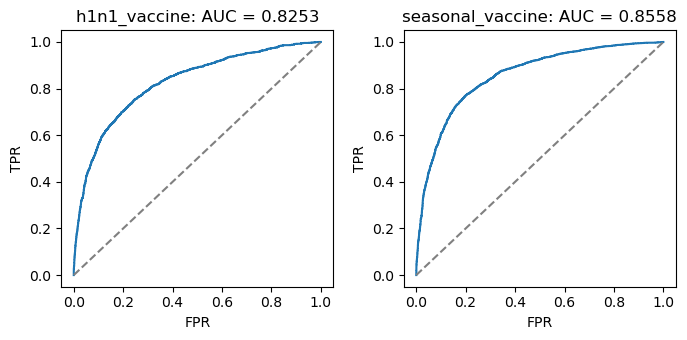

In [137]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_h1n1[:,1],
        "seasonal_vaccine": pred_seasonal[:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

In [138]:
# COMPETITION METRIC:
roc_auc_score(y_eval, y_preds)

0.8405316290530752

Repeat with a MultiOutputClassifier instead of the two:

In [139]:
# try accurately the same with a multiOutputClassifier:

multi_estimator = MultiOutputClassifier(estimator=LogisticRegression(random_state=42 ,penalty="l2", C=1))
multi_pipeline = Pipeline([
    ("full_columnTransformer", full_columnTransformer),
    ("multi_estimator", multi_estimator)
])

c:\Users\Hal9\anaconda3\envs\condaPytorchEnv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Hal9\anaconda3\envs\condaPytorchEnv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

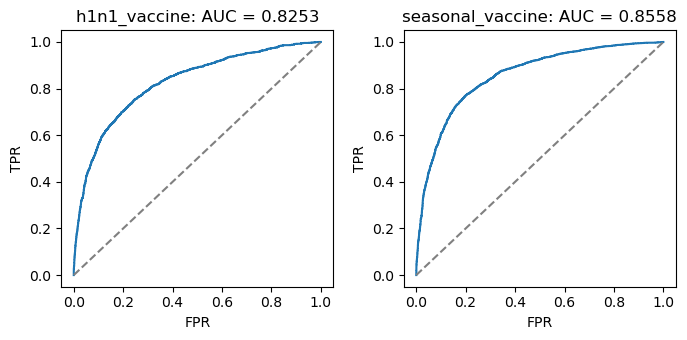

In [140]:
multi_pipeline.fit(X_train, y_train)
multi_preds = multi_pipeline.predict_proba(X_eval)

y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": multi_preds[0][:,1],
        "seasonal_vaccine": multi_preds[1][:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

#### Summary: 
1. including the categorial columns does not improve the logistic regression classifier.
2. there is no difference in taking a multioutput-classifier or one classifier each for the two parts of the multi-label.

### Support Vector Machine ###

In [54]:
# train test split:
RANDOM_SEED = 42

# output types are numpy.ndarray:
#X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_train_df.iloc[:,1:].to_numpy(), y_train_df.iloc[:,1:].to_numpy(), test_size=0.2, shuffle=True)

# output types are pandas dataframes:
X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size=0.33, shuffle=True, stratify=y_train_df, random_state=RANDOM_SEED)


In [55]:
# prepare the labels for the two predictions we have to make:

y_train_h1n1 = y_train.values[:,0].ravel()
y_train_seasonal = y_train.values[:,1].ravel()
y_eval_h1n1 = y_eval.values[:,0].ravel()
y_eval_seasonal = y_eval.values[:,1].ravel()

for s, a in zip(["y_train_h1n1", "y_train_seasonal", "y_eval_h1n1", "y_eval_seasonal"], [y_train_h1n1, y_train_seasonal, y_eval_h1n1, y_eval_seasonal]):
    print(f"Shape of {s}: {a.shape}")

Shape of y_train_h1n1: (17893,)
Shape of y_train_seasonal: (17893,)
Shape of y_eval_h1n1: (8814,)
Shape of y_eval_seasonal: (8814,)


In [56]:
# numeric columns for svm:

num_cols = X_train_df.columns[X_train_df.dtypes != 'object'].values

numeric_preprocessing_pipeline = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("simple_imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_pipeline, num_cols)
    ],
    remainder="drop"
)

multi_estimator_SVC= MultiOutputClassifier(estimator=SVC(kernel="rbf", gamma=5, C=0.01, probability=True))

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("multi_estimator_SVC", multi_estimator_SVC),
])

In [57]:
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

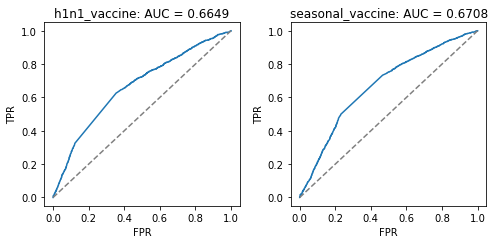

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

In [ ]:
from sklearn.svm import LinearSVC

svm_clf_h1n1 = LinearSVC(loss="hinge", C=1)
svm_clf_h1n1.fit(X_train, y_train_h1n1)
y_preds_h1n1 = svm_clf_h1n1.predict(X_eval)
h1n1_acc = accuracy_score(y_true=y_eval_h1n1, y_pred=y_preds_h1n1)
print(f"h1n1 accuracy: {h1n1_acc:.3}")

svm_clf_seasonal = LinearSVC(loss="hinge", C=1)
svm_clf_seasonal.fit(X_train, y_train_seasonal)
y_preds_seasonal = svm_clf_seasonal.predict(X_eval)
seasonal_acc = accuracy_score(y_pred=y_preds_seasonal, y_true=y_eval_seasonal)
print(f"sesonal accuracy: {seasonal_acc:.3}")

# out:
# with LinearSVC(loss="hinge", C=1):
# time: 0.2s
# h1n1 accuracy: 0.791
# sesonal accuracy: 0.692

In [ ]:
print(len(X_train), len( y_train_h1n1))

17893 17893


In [ ]:
# two svm's with preprocessing pipeline:

svm_clf_h1n1 = SVC(kernel="rbf", gamma=5, C=0.01, probability=True)
h1n1_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_clf_h1n1", svm_clf_h1n1),
])

svm_clf_seasonal = SVC(kernel="rbf", gamma=5, C=0.01, probability=True)
seasonal_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm_clf_seasonal" ,svm_clf_seasonal)
])

h1n1_pipeline.fit(X_train, y_train_h1n1)
pred_h1n1 = h1n1_pipeline.predict_proba(X_eval)

seasonal_pipeline.fit(X_train, y_train_seasonal)
pred_seasonal = seasonal_pipeline.predict_proba(X_eval)

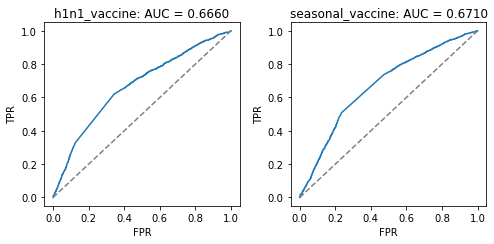

In [ ]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": pred_h1n1[:,1],
        "seasonal_vaccine": pred_seasonal[:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

### Decision Tree ###

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

random_seed = 0
h1n1_clf = DecisionTreeClassifier(random_state=random_seed)
h1n1_scores = cross_val_score(h1n1_clf, X_train, y_train_h1n1, cv=10)
print(f"Average h1n1 cross-validation score: {np.average(h1n1_scores):.3}")

seasonal_clf = DecisionTreeClassifier(random_state=random_seed)
seasonal_scores = cross_val_score(seasonal_clf, X_train, y_train_seasonal)
print(f"Average sesonal cross-validation score: {np.average(seasonal_scores):.3}")

# out:
# with: cross_val_score(..., cv=10)
# time: 1.9s
# Average h1n1 cross-validation score: 0.742
# Average sesonal cross-validation score: 0.617

Average h1n1 cross-validation score: 0.758
Average sesonal cross-validation score: 0.681


### Random Forrest - Using Numerical Only ###

In [11]:
# train test split:
RANDOM_SEED = 42

# output types are numpy.ndarray:
#X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_train_df.iloc[:,1:].to_numpy(), y_train_df.iloc[:,1:].to_numpy(), test_size=0.2, shuffle=True)

# output types are pandas dataframes:
X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size=0.33, shuffle=True, stratify=y_train_df, random_state=RANDOM_SEED)


In [12]:
from sklearn.ensemble import RandomForestClassifier

max_depth = 10
n_estimators = 200

rdfc = RandomForestClassifier(max_depth=max_depth, random_state=0, n_estimators=n_estimators)

# numeric columns for regression:

num_cols = X_train_df.columns[X_train_df.dtypes != 'object'].values
print(num_cols)

numeric_preprocessing_pipeline = Pipeline([
    ("simple_imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_pipeline, num_cols)
    ],
    remainder="drop"
)

multi_estimator_rdf= MultiOutputClassifier(estimator=rdfc)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("multi_estimator_rdf", multi_estimator_rdf),
])

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [13]:
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

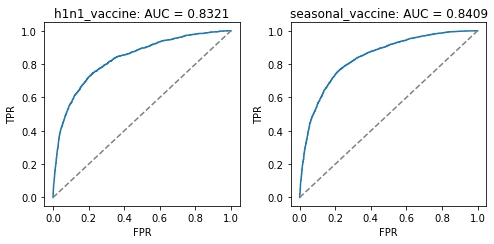

In [17]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

In [18]:
# COMPETITION METRIC:
roc_auc_score(y_eval, y_preds)

0.8364909226136257

In [19]:
# training on full dataset:
full_pipeline.fit(X_train_df, y_train_df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_...
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('multi_estimator_rdf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                    

In [20]:
test_preds = full_pipeline.predict_proba(X_test_df)

In [24]:
submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")

In [25]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [22]:
np.testing.assert_array_equal(submission_df.index.values, X_test_df.index.values)
submission_df["h1n1_vaccine"]=test_preds[0][:,1]
submission_df["seasonal_vaccine"]=test_preds[1][:,1]

submission_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.169968,0.423442
26708,0.043840,0.060612
26709,0.370553,0.683098
26710,0.531894,0.786743
26711,0.293207,0.565102


In [23]:
submission_df.to_csv("my_submission.csv", index=True)

### Random Forrest - Using all Columns ###

In [13]:
# impute missing values, scale numeric values, one-hot-encode non-numeric values:

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

numeric_columns = X_train_df.columns[X_train_df.dtypes != "object"]
non_numeric_columns = X_train_df.columns[X_train_df.dtypes == "object"]
max_depth = 10
n_estimators = 400
rdfc = RandomForestClassifier(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
multi_rdfc = MultiOutputClassifier(estimator=rdfc)

numeric_preprocessing_pipeline = Pipeline([
    ("SimpleImputer", SimpleImputer(strategy="median"))
])

full_columnTransformer = ColumnTransformer(
    transformers= [
        ("numeric_preprocessing", numeric_preprocessing_pipeline, numeric_columns),
        ("ohe", OneHotEncoder(), non_numeric_columns)
    ],
    remainder="passthrough"
)

full_pipeline = Pipeline([
    ("ColumnTransformer", full_columnTransformer),
    ("MultiEstimator", multi_rdfc)
])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X_train_df, y_train_df, test_size= 0.3, random_state=42, shuffle=True)

In [15]:
full_pipeline.fit(X_train, y_train)
preds = full_pipeline.predict_proba(X_eval)

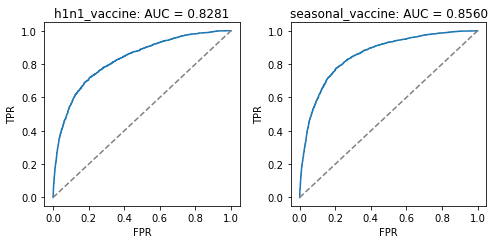

In [16]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": preds[0][:,1],
        "seasonal_vaccine": preds[1][:,1],
    },
    index=y_eval.index
)

plot_roc_h1n1_and_seasonal()

In [17]:
roc_auc_score( y_eval, y_preds)

0.8420648614001554

In [48]:
# train with full dataset and prepare to save:

full_pipeline.fit(X_train_df, y_train_df)

test_preds = full_pipeline.predict_proba(X_test_df)

submission_df = pd.read_csv("submission_format.csv", index_col="respondent_id")
np.testing.assert_array_equal(submission_df.index.values, X_test_df.index.values)

submission_df["h1n1_vaccine"]=test_preds[0][:,1]
submission_df["seasonal_vaccine"]=test_preds[1][:,1]

submission_df.head(5)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.175011,0.367039
26708,0.054028,0.087831
26709,0.404191,0.710595
26710,0.412015,0.789349
26711,0.265773,0.511174


In [49]:
# save to "my_submission" file:

my_submission_file = "my_submission.csv"
submission_df.to_csv(my_submission_file, index=True)